# 1. Problem
MNIST handwritten digits dataset contains 60,000 examples for training and 10,000 examples for testing. The digits have been size-normalized and centered in a fixed-size image (28x28 pixels) with values from 0 to 1. For simplicity, each image has been flattened and converted to a 1-D numpy array of 784 features (28*28).

![MNIST Dataset](http://neuralnetworksanddeeplearning.com/images/mnist_100_digits.png)

More info: http://yann.lecun.com/exdb/mnist/

In [1]:
import tensorflow as tf

# Import MINST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./mnist_data/t10k-images-idx3-ubyte.gz
Extracting ./mnist_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


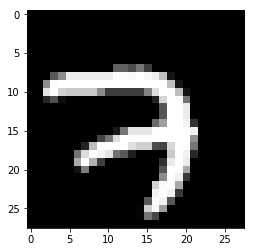

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


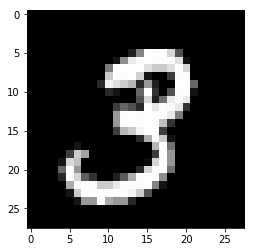

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


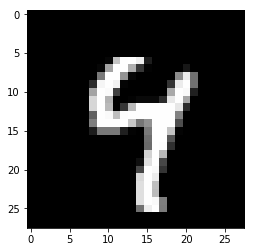

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


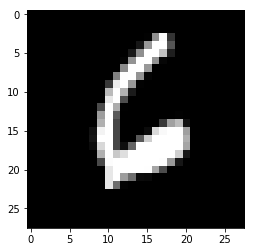

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


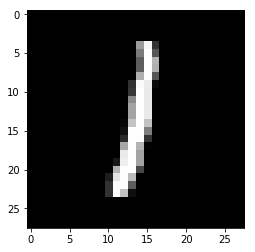

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [6]:
import matplotlib.pyplot as plt
import numpy as np

for i in range(5):
    plt.imshow(np.reshape(mnist.train.images[i], [28, 28]), cmap="gray")
    plt.show()
    print(mnist.train.labels[i])

In [4]:
# Parameters
learning_rate = 0.01
training_epochs = 25
batch_size = 100
display_step = 1

# tf Graph Input
x = tf.placeholder(tf.float32, [None, 784])     # mnist data image of shape 28*28=784
y = tf.placeholder(tf.float32, [None, 10])      # 0-9 digits recognition => 10 classes

# Set model weights
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

# Construct model
pred = tf.nn.softmax(tf.matmul(x, W) + b)       # Softmax

# Minimize error using cross entropy
cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), reduction_indices=1))
# Gradient Descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

In [7]:
# Start training
with tf.Session() as sess:
    sess.run(init)
    
    # Training cycle\n",
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            # Fit training using batch data
            _, c = sess.run([optimizer, cost], feed_dict={x: batch_xs, y: batch_ys})
            # Compute average loss
            avg_cost += c / total_batch
        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            print("Epoch:", '%04d' % (epoch + 1), "cost=", "{:.9f}".format(avg_cost))
                
    print("Optimization Finished!")
    
    # Test model
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    # Calculate accuracy for 3000 examples
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Accuracy:", accuracy.eval({x: mnist.test.images[:3000], y: mnist.test.labels[:3000]}))

Epoch: 0001 cost= 1.183327212
Epoch: 0002 cost= 0.665246485
Epoch: 0003 cost= 0.552840189
Epoch: 0004 cost= 0.498705262
Epoch: 0005 cost= 0.465559095
Epoch: 0006 cost= 0.442632003
Epoch: 0007 cost= 0.425579600
Epoch: 0008 cost= 0.412186604
Epoch: 0009 cost= 0.401397043
Epoch: 0010 cost= 0.392398060
Epoch: 0011 cost= 0.384814230
Epoch: 0012 cost= 0.378221851
Epoch: 0013 cost= 0.372414403
Epoch: 0014 cost= 0.367246694
Epoch: 0015 cost= 0.362693729
Epoch: 0016 cost= 0.358531473
Epoch: 0017 cost= 0.354913140
Epoch: 0018 cost= 0.351481016
Epoch: 0019 cost= 0.348272837
Epoch: 0020 cost= 0.345386829
Epoch: 0021 cost= 0.342765761
Epoch: 0022 cost= 0.340258389
Epoch: 0023 cost= 0.337910941
Epoch: 0024 cost= 0.335762663
Epoch: 0025 cost= 0.333723683
Optimization Finished!
Accuracy: 0.89
